#import basic libararies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC

#load dataset

In [ ]:
salary_test=pd.read_csv('SalaryData_Test.csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
salary_train=pd.read_csv('SalaryData_Train.csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#EDA

In [ ]:
salary_train.shape



(30161, 14)

In [ ]:
salary_test.shape

(15060, 14)

In [ ]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
salary_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [ ]:
salary_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [ ]:
salary_train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [ ]:
salary_test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

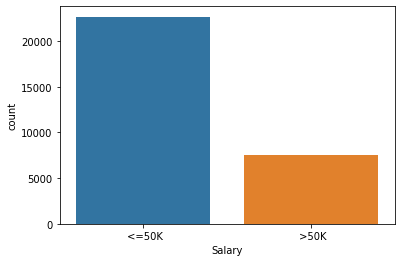

In [ ]:
sns.countplot(x='Salary',data=salary_train)
plt.show()

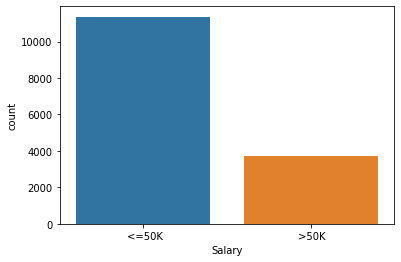

In [ ]:
sns.countplot(x='Salary',data=salary_test)
plt.show()

In [ ]:
columns= ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]


#encoding the categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
for i in columns:
  salary_train[i]=le.fit_transform(salary_train[i])
  salary_test[i]=le.fit_transform(salary_test[i])

In [ ]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [ ]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [ ]:
x_train=salary_train.iloc[:,0:13]
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [ ]:
x_test=salary_test.iloc[:,0:13]
x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [ ]:
y_train=salary_train.iloc[:,13:]
y_train

,Salary
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
30156,<=50K
30157,>50K
30158,<=50K
30159,<=50K


In [ ]:
y_test=salary_test.iloc[:,13:]
y_test

,Salary
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
15055,<=50K
15056,<=50K
15057,<=50K
15058,<=50K


#standardising the data

In [ ]:
std=StandardScaler()
x_train=pd.DataFrame(std.fit_transform(x_train))
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.042779,2.935947,-0.349827,1.128898,0.947877,-1.479030,-0.261233,0.385055,0.692771,0.146085,-0.218508,-0.077735,0.266358
1,0.880261,1.887645,-0.349827,1.128898,-0.387243,-0.734533,-0.885712,0.385055,0.692771,-0.147447,-0.218508,-2.331495,0.266358
2,-0.033356,-0.208958,0.174805,-0.439733,-1.722362,-0.238202,-0.261233,0.385055,0.692771,-0.147447,-0.218508,-0.077735,0.266358
3,1.108665,-0.208958,-2.448354,-1.224048,-0.387243,-0.238202,-0.885712,-2.010994,0.692771,-0.147447,-0.218508,-0.077735,0.266358
4,-0.794703,-0.208958,-0.349827,1.128898,-0.387243,0.754461,2.236683,-2.010994,-1.443479,-0.147447,-0.218508,-0.077735,-5.273965
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.870838,-0.208958,-0.874459,0.736740,-0.387243,1.498958,2.236683,0.385055,-1.443479,-0.147447,-0.218508,-0.244681,0.266358
30157,0.118914,-0.208958,0.174805,-0.439733,-0.387243,0.009964,-0.885712,0.385055,0.692771,-0.147447,-0.218508,-0.077735,0.266358
30158,1.489339,-0.208958,0.174805,-0.439733,2.282996,-1.479030,1.612204,0.385055,-1.443479,-0.147447,-0.218508,-0.077735,0.266358
30159,-1.251511,-0.208958,0.174805,-0.439733,0.947877,-1.479030,0.987725,0.385055,0.692771,-0.147447,-0.218508,-1.747187,0.266358


In [ ]:
x_test=pd.DataFrame(std.fit_transform(x_test))
x_test

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.029005,-0.222347,-2.423439,-1.216563,0.933187,0.002725,1.006108,-2.034389,0.695832,-0.145438,-0.219169,-0.078889,0.260581
1,-0.057423,-0.222347,0.190172,-0.434898,-0.395463,-0.494789,-0.881990,0.382230,0.695832,-0.145438,-0.219169,0.750131,0.260581
2,-0.804794,-1.257126,-0.855272,0.737599,-0.395463,0.997755,-0.881990,0.382230,0.695832,-0.145438,-0.219169,-0.078889,0.260581
3,0.391000,-0.222347,1.235617,-0.044066,-0.395463,0.002725,-0.881990,-2.034389,0.695832,0.852624,-0.219169,-0.078889,0.260581
4,-0.356371,-0.222347,-2.684800,-1.607395,0.933187,0.251483,-0.252624,0.382230,0.695832,-0.145438,-0.219169,-0.907909,0.260581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.431108,-0.222347,-0.332550,1.128431,0.933187,0.748998,1.006108,0.382230,0.695832,-0.145438,-0.219169,-0.078889,0.260581
15056,0.017315,-0.222347,-0.332550,1.128431,-1.724114,0.748998,-0.252624,0.382230,-1.437128,-0.145438,-0.219169,-0.410497,0.260581
15057,-0.057423,-0.222347,-0.332550,1.128431,-0.395463,0.748998,-0.881990,0.382230,0.695832,-0.145438,-0.219169,0.750131,0.260581
15058,0.391000,-0.222347,-0.332550,1.128431,-1.724114,-1.489819,1.006108,-3.242699,0.695832,0.562734,-0.219169,-0.078889,0.260581


In [ ]:
y_train=le.fit_transform(y_train)
y_train

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_test=le.fit_transform(y_test)
y_test
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
y_test

array([0, 0, 1, ..., 0, 0, 1])

#SVM model

#linear kernel

In [ ]:
linear=SVC(kernel='linear')
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)
y_pred
acc=accuracy_score(y_test,y_pred)*100
acc

80.92961487383799

In [ ]:
con_linear=confusion_matrix(y_test,y_pred)
con_linear

array([[11009,   351],
       [ 2521,  1179]])

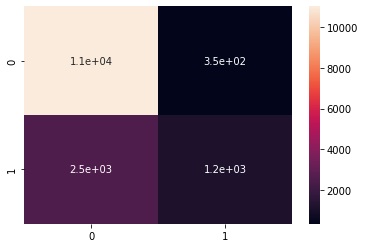

In [ ]:
sns.heatmap(con_linear,annot=True)

#rbf kernel

In [ ]:
rbf=SVC(kernel='rbf')
rbf.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=rbf.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
acc=accuracy_score(y_test,y_pred)*100
acc

84.6547144754316

In [ ]:
con_rbf=confusion_matrix(y_test,y_pred)
con_rbf

array([[10715,   645],
       [ 1666,  2034]])

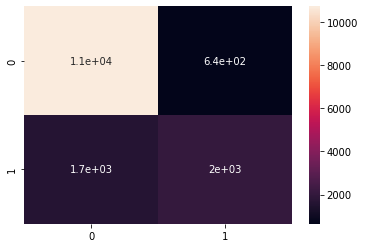

In [ ]:
sns.heatmap(con_rbf,annot=True)

#poly kernel

In [ ]:
poly=SVC(kernel='poly')
poly.fit(x_train,y_train)

SVC(kernel='poly')

In [ ]:
y_pred=poly.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
acc=accuracy_score(y_test,y_pred)*100
acc

84.06374501992032

In [ ]:
con_poly=confusion_matrix(y_test,y_pred)
con_poly

array([[10743,   617],
       [ 1783,  1917]])

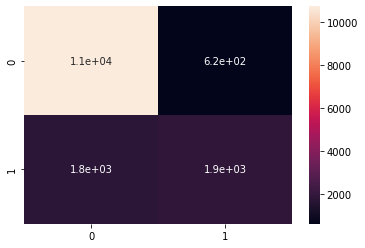

In [ ]:
sns.heatmap(con_poly,annot=True)

In [ ]:
#out of above three models the rbf has the heighest accuracy i.e 84.6547144754316